                                             Exploratory Data analysis

The zomato exploratory data analysis is for the foodies to find the best restaurants, value for money restaurants in their locality. 
It also helps to find their required cuisines in their locality.  "

In [3]:
import numpy as np
import pandas as pd
import sklearn
df=pd.read_csv("ZomatoRestaurantsIndia.csv",encoding="ISO-8859-1")
#data=pd.merge(df,city, on= 'city_id')
#data = pd.merge(df, country, on='Country Code')
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,0.0,1,-1


In [4]:
df.shape

(211944, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
res_id                  211944 non-null int64
name                    211944 non-null object
establishment           207117 non-null object
url                     211944 non-null object
address                 211810 non-null object
city                    211944 non-null object
city_id                 211944 non-null int64
locality                211944 non-null object
latitude                211944 non-null float64
longitude               211944 non-null float64
zipcode                 48757 non-null object
country_id              211944 non-null int64
locality_verbose        211944 non-null object
cuisines                210553 non-null object
timings                 208070 non-null object
average_cost_for_two    211944 non-null int64
price_range             211944 non-null int64
currency                211944 non-null object
highlights              209875 non-null object


In [6]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499805,77.615276,1.0,595.812229,1.882535,3.395937,378.002571,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781315,7.500104,0.0,606.239363,0.892989,1.283642,925.333106,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [7]:
df.isnull().any(axis=0)

res_id                  False
name                    False
establishment            True
url                     False
address                  True
city                    False
city_id                 False
locality                False
latitude                False
longitude               False
zipcode                  True
country_id              False
locality_verbose        False
cuisines                 True
timings                  True
average_cost_for_two    False
price_range             False
currency                False
highlights               True
aggregate_rating        False
rating_text             False
votes                   False
photo_count             False
opentable_support        True
delivery                False
takeaway                False
dtype: bool

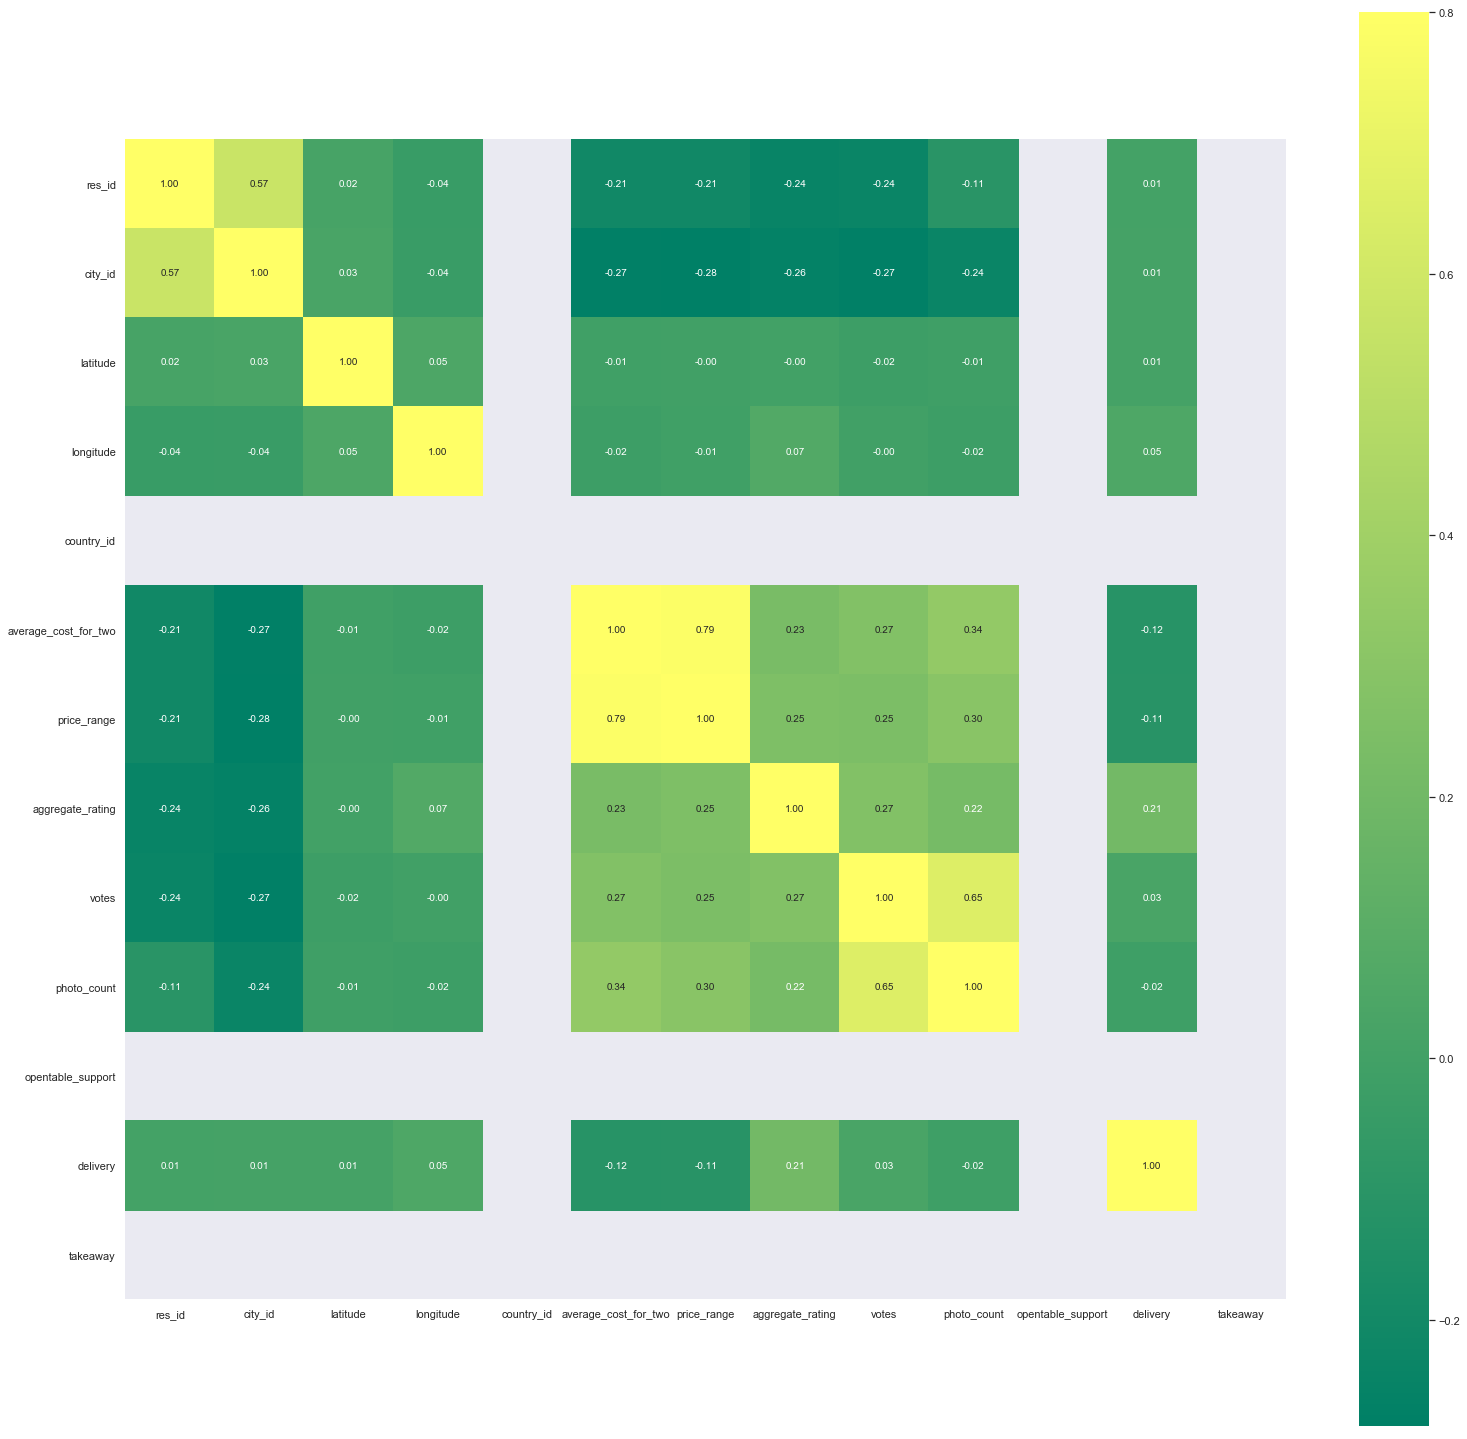

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
f, ax = plt.subplots(figsize=(26,26))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt='.2f', cmap='summer' );
#No significant correlated features found all are below 0.5

In [9]:
data_city = df.groupby(['city'], as_index=False).count()[['city', 'res_id']]
data_city.head()
data_city.columns = ['city', 'No of Restaurant']

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97],
 <a list of 98 Text xticklabel objects>)

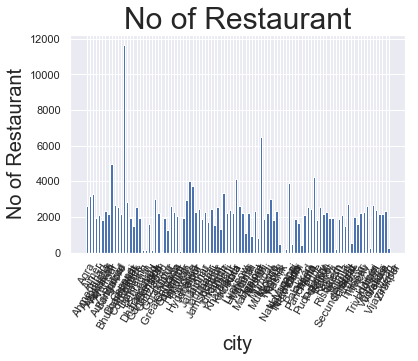

In [10]:
plt.bar(data_city['city'], data_city['No of Restaurant'])
plt.xlabel('city', fontsize=20)
plt.rcParams['figure.figsize']=(100,90) 
plt.ylabel('No of Restaurant', fontsize=20)
plt.title('No of Restaurant', fontsize=30)
plt.xticks(rotation = 60)

In [11]:
from sklearn.preprocessing import LabelEncoder
number= LabelEncoder()
df['rating_text'] = number.fit_transform(df['rating_text'].astype('str'))
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,32,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,32,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,32,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,32,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,11,470,291,0.0,1,-1


<BarContainer object of 98 artists>

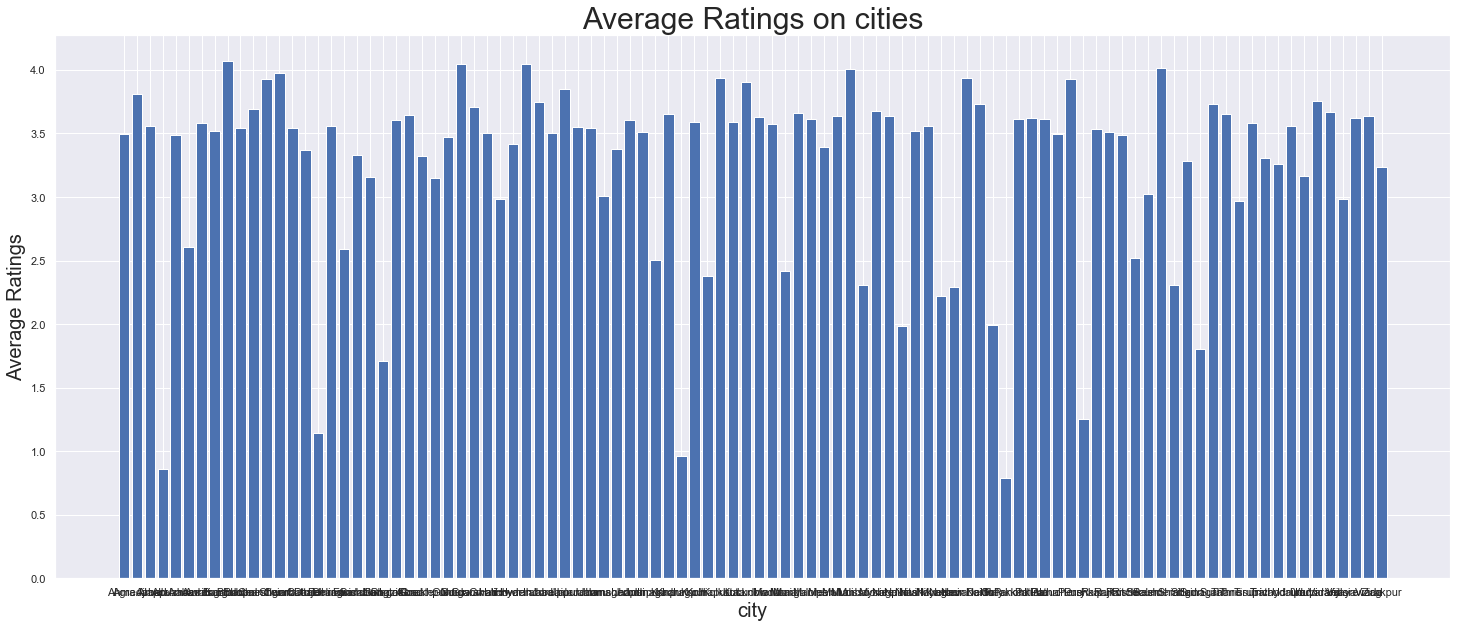

In [12]:
average_ratings = df.groupby(['city'], as_index=False)
average_ratings_agg = average_ratings['aggregate_rating'].agg(np.mean)
plt.figure(figsize=(25,10))
plt.xlabel('city', fontsize=20)
plt.ylabel('Average Ratings', fontsize=20)
plt.title('Average Ratings on cities', fontsize=30)
plt.bar(average_ratings_agg['city'], average_ratings_agg['aggregate_rating'])

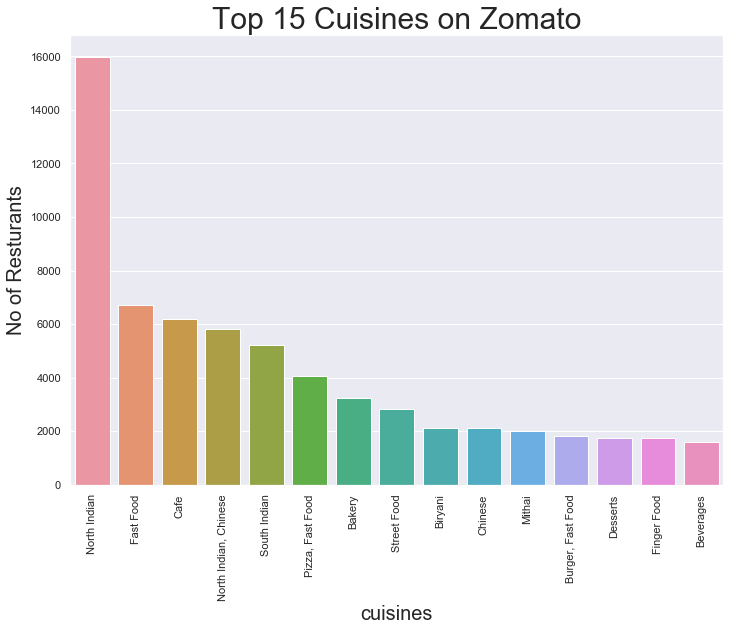

In [13]:
Cuisine_data =df.groupby(['cuisines'], as_index=False)['res_id'].count()
Cuisine_data.columns = ['cuisines', 'No of Resturants']
Top15= (Cuisine_data.sort_values(['No of Resturants'],ascending=False)).head(15)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(Top15['cuisines'], Top15['No of Resturants'])
plt.xlabel('cuisines', fontsize=20)
plt.ylabel('No of Resturants', fontsize=20)
plt.title('Top 15 Cuisines on Zomato', fontsize=30)
plt.xticks(rotation = 90)
plt.show()

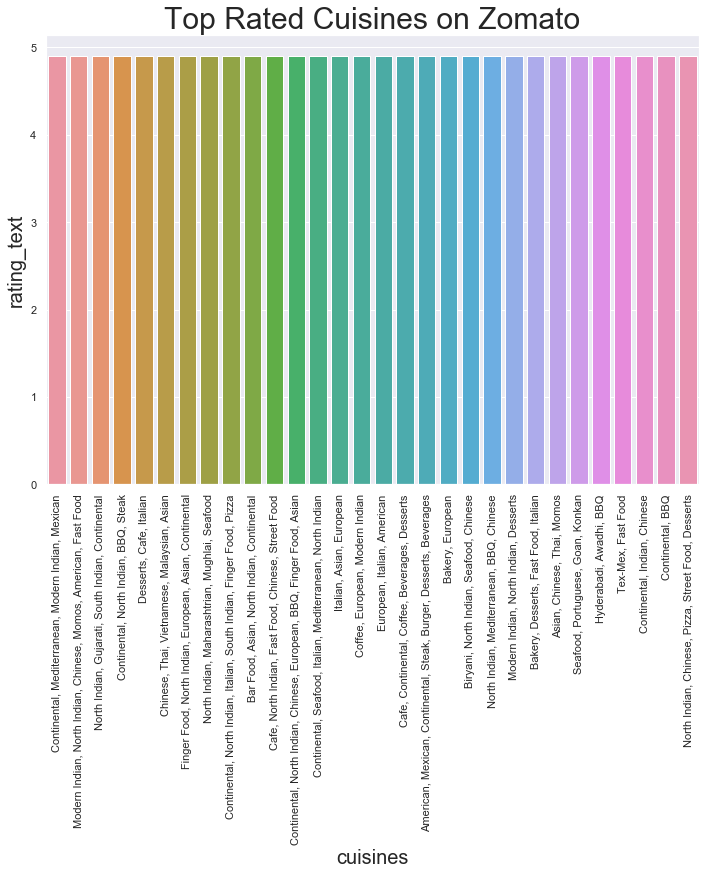

In [14]:
Cuisine_data_rating=(df.groupby(['cuisines'], as_index=False)['aggregate_rating'].mean())
Cuisine_data_rating.columns = ['cuisines', 'rating_text']
Top30_ratings= (Cuisine_data_rating.sort_values(['rating_text'],ascending=False)).head(30)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(Top30_ratings['cuisines'], Top30_ratings['rating_text'])
plt.title('Top Rated Cuisines on Zomato', fontsize=30)
plt.xlabel('cuisines', fontsize=20)
plt.ylabel('rating_text', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

In [15]:
Cuisine_data_rating=(df.groupby(['city'], as_index=False)['price_range'].mean())
Cuisine_data_rating.columns = ['city', 'price_range' ]
Cuisine_data_rating.sort_values(['price_range'],ascending=False).head()

,city,price_range
22,Goa,3.141711
72,Puducherry,2.657591
26,Gurgaon,2.586047
56,Mumbai,2.557488
65,New Delhi,2.466565


In [16]:
df['rating_text'].value_counts()

32    65452
12    63384
0     42157
19    23478
11    15737
22     1175
36       56
26       44
15       44
10       42
17       35
2        30
4        26
29       25
1        24
13       22
31       22
37       19
21       18
33       17
30       16
6        14
28       13
8        12
5        11
7         9
9         8
35        8
34        7
16        6
25        6
18        5
24        5
14        3
20        3
23        3
27        3
38        3
3         2
Name: rating_text, dtype: int64

In [17]:
Text_Rating_India = df.groupby(['city'], as_index=False).count()[['city', 'res_id']]
Text_Rating_India.head()
Text_Rating_India.columns = ['city', 'No of Restaurant']
Restaurant_text_rating=df.groupby(['city', 'rating_text'], as_index=False)['res_id'].count()
Total_Restaurant_text_rating_india = pd.merge(Text_Rating_India, Restaurant_text_rating, on='city')             
Total_Restaurant_text_rating_india['Percentage'] = (Total_Restaurant_text_rating_india['res_id']/Total_Restaurant_text_rating_india['No of Restaurant'])*100
Total_Restaurant_text_rating_india

,city,No of Restaurant,rating_text,res_id,Percentage
0,Agra,2622,0,379,14.454615
1,Agra,2622,1,1,0.038139
2,Agra,2622,8,1,0.038139
3,Agra,2622,10,1,0.038139
4,Agra,2622,11,130,4.958047
5,Agra,2622,12,778,29.672006
6,Agra,2622,19,258,9.839817
7,Agra,2622,22,13,0.495805
8,Agra,2622,26,1,0.038139
9,Agra,2622,32,1060,40.427155


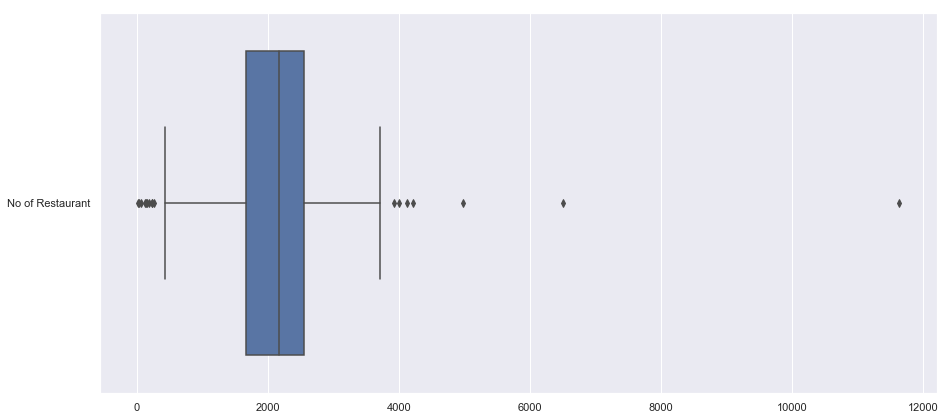

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

f,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=data_city, orient='h');

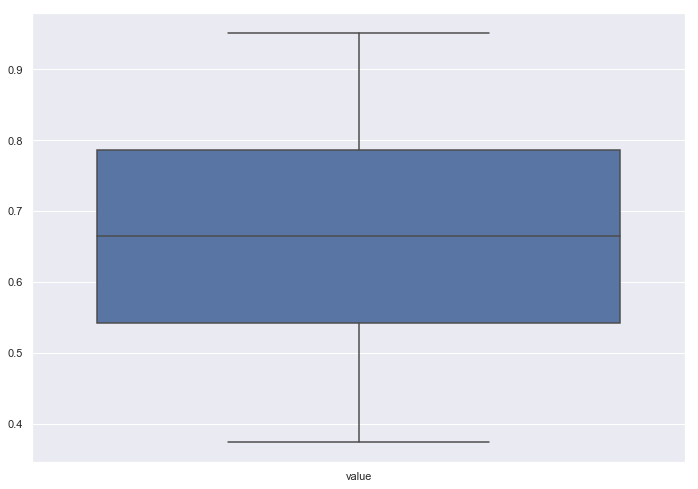

In [22]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.DataFrame(data = np.random.random(size=(4,1)), columns = ['photo_count'])

sns.boxplot( data=pd.melt(df1))

plt.show()

In [24]:
col1=df['aggregate_rating']
col2=df['average_cost_for_two']
correlation = col1.corr(col2)
print(correlation)

0.23234733565462165


In [ ]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5, stopwords=stopwords).generate_from_frequencies(data['Restaurant Name'].value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()